## VODAFONE CUSTOMER CHURN ANALYSIS - TEAM PRETORIA - LP2

### Data Understanding
This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

- customerID: unique identifier for each customer
- gender: customer gender (Male/Female)
- SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
- Partner: indicates if the customer has a partner or not (Yes, No)
- Dependents: indicates if the customer has dependents or not (Yes, No)
- tenure: number of months the customer has stayed with the company
- PhoneService: indicates if the customer has a phone service or not (Yes, No)
- MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: type of internet service the customer has (DSL, Fiber optic, No)
- OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
- DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
- TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
- Contract: type of contract the customer has (Month-to-month, One year, Two year)
- PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
- PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: amount charged to the customer monthly
- TotalCharges: total amount charged to the customer
- Churn: indicates if the customer has churned or not (Yes, No) 

#### SETUP

##### INSTALLING RELEVAT LIBRARIES


In [119]:
# pip install database interaction library
#%pip install pyodbc
#%pip install plotly
#%pip install statsmodels
#%pip install imblearn 

#### IMPORTATION OF LIBRARIES 

In [120]:
import pandas as pd
import pyodbc
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings('ignore')

#### DATA LOADING

In [121]:
# create server instance variables
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'


#Establish connection with server 
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [122]:
#Connecting to the Server
connection = pyodbc.connect(connection_string)

In [123]:
#Get data from server with query 'Select *'
query = "Select * from dbo.LP2_Telco_churn_first_3000"
sql_data = pd.read_sql(query, connection)

In [124]:
sql_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [125]:
sql_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [126]:
#read csv for remaining data from GitHub repository
data = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [127]:
#onedrive_data = pd.read_excel('Telco-churn-second-2000.xlsx')


In [128]:
#Merge dataset
voda_churn_train = pd.concat([sql_data, data])
voda_churn_train.to_csv('voda_customer_churn.csv')

#### EXPLORATORY DATA ANALYSIS 

Null Hypothesis: Customers with high monthly charges do not have the tendency to churn 

Alt Hypothesis: Customers with high monthly Charges have the tendency to churn 


Questions 
- What is the correlation between a customers tendency to churn and their internet Service 
- How many Senior Citizens with dependents churn
- What is the correlation between Customers with multiples line and their ability to churn
- Which features and services are most profitable?
- What features have the most impact on customers ability to churn

In [129]:
sql_data.shape

(3000, 21)

In [130]:
data.shape

(2043, 21)

In [131]:
voda_churn_train.shape

(5043, 21)

In [132]:
train_df = pd.read_csv('voda_customer_churn.csv')

In [133]:
train_df.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,2042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Seems to have an unwanted column called the Unamed:0

In [134]:
train_df = train_df.drop('Unnamed: 0', axis = 'columns')

In [135]:
#train_df = voda_churn_train

In [136]:
train_df.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


In [137]:
#checking number of unique values in every column 
train_df.nunique()

customerID          5043
gender                 2
SeniorCitizen          4
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4870
Churn                  4
dtype: int64

In [138]:
train_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

We can see here that there are some empty values, on both numeric and Caetegorical. for now we will work i=on the numeric one 

In [139]:
# we will replace the empty values the Total Amount column with the mean values
train_df['TotalCharges'] = pd.to_numeric(train_df["TotalCharges"], errors= "coerce")

# we therefore will repalce with the mean of the Values in that column 
train_df['TotalCharges'].fillna(value= train_df["TotalCharges"].mean().round(3), inplace= True)

In [140]:
# Check duplicated values 
train_df.duplicated().sum()

0

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


#### Issues identified 
- TotalCharges column in in object instead
- No duplicates 


In [142]:
# Do describe and transpose 
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2302.062861,2267.682399,18.799999,418.000,1406.000000,3857.575073,8670.100000


- #### Checking Columns and their unique values 

In [143]:
train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [211]:
#Check Unique values for Columns
print('The unique Value of the Columns are;')
Churn = train_df.Churn.unique()
print(f"Churn : {Churn} ")

gender = train_df.gender.unique()
print(f"gender : {gender} ")

SeniorCitizen = train_df.SeniorCitizen.unique()
print(f"SeniorCitizen : {SeniorCitizen} ")

Partner = train_df.Partner.unique()
print(f"Partner : {Partner} ")

Dependents = train_df.Dependents.unique()
print(f"Dependents : {Dependents} ")

tenure = train_df.tenure.unique()
print(f"tenure : {tenure} ")

PhoneService = train_df.PhoneService.unique()
print(f"PhoneService : {PhoneService} ")

MultipleLines = train_df.MultipleLines.unique()
print(f"MultipleLines : {MultipleLines} ")

InternetService = train_df.InternetService.unique()
print(f"InternetService : {InternetService} ")

OnlineSecurity = train_df.OnlineSecurity.unique()
print(f"OnlineSecurity : {OnlineSecurity} ")

OnlineBackup = train_df.OnlineBackup.unique()
print(f"OnlineBackup : {OnlineBackup} ")

DeviceProtection = train_df.DeviceProtection.unique()
print(f"DeviceProtection : {DeviceProtection} ")

TechSupport = train_df.TechSupport.unique()
print(f"TechSupport : {TechSupport} ")

StreamingTV = train_df.StreamingTV.unique()
print(f"StreamingTV : {StreamingTV} ")

StreamingMovies = train_df.StreamingMovies.unique()
print(f"StreamingMovies : {StreamingMovies} ")

Contract = train_df.Contract.unique()
print(f"Contract : {Contract} ")

PaperlessBilling = train_df.PaperlessBilling.unique()
print(f"PaperlessBilling : {PaperlessBilling} ")

PaymentMethod = train_df.PaymentMethod.unique()
print(f"PaymentMethod : {PaymentMethod} ")

MonthlyCharges = train_df.MonthlyCharges.unique()
print(f"MonthlyCharges : {MonthlyCharges} ")

TotalCharges = train_df.TotalCharges.unique()
print(f"TotalCharges : {TotalCharges} ")

The unique Value of the Columns are;
Churn : ['No' 'Yes' nan] 
gender : ['Female' 'Male'] 
SeniorCitizen : ['False' 'True'] 
Partner : ['True' 'False' 'No' 'Yes'] 
Dependents : ['False' 'True' 'No' 'Yes'] 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
PhoneService : ['False' 'True' 'Yes' 'No'] 
MultipleLines : [nan 'False' 'True' 'No' 'No phone service' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['False' 'True' nan 'No' 'Yes' 'No internet service'] 
OnlineBackup : ['True' 'False' nan 'No' 'Yes' 'No internet service'] 
DeviceProtection : ['False' 'True' nan 'No' 'Yes' 'No internet service'] 
TechSupport : ['False' 'True' nan 'Yes' 'No' 'No internet service'] 
StreamingTV : ['False' 'True' nan 'No' 'Yes' 'No internet service'] 
StreamingMovies : ['False' 'True' nan 'No' 'Yes'

In [228]:
train_df['Churn'] = train_df['Churn'].str.replace('False', 'No')
train_df['Churn'] = train_df['Churn'].str.replace('True', 'Yes')

#Senior Citizen Column 
train_df['SeniorCitizen'] = train_df['SeniorCitizen'].str.replace( '0','False')
train_df['SeniorCitizen'] = train_df['SeniorCitizen'].str.replace('1','True')

#Partner Column 
train_df['Partner'] = train_df['Partner'].str.replace('False', 'No')
train_df['Partner'] = train_df['Partner'].str.replace('True', 'Yes')

#Online Security 
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].str.replace('False', 'No')
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].str.replace('True', 'Yes')
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].str.replace('No internet service', 'No')

#Dependents Column
train_df['Dependents'] = train_df['Dependents'].str.replace('False', 'No')
train_df['Dependents'] = train_df['Dependents'].str.replace('True', 'Yes')

#PhoneService Column
train_df['PhoneService'] = train_df['PhoneService'].str.replace('False', 'No')
train_df['PhoneService'] = train_df['PhoneService'].str.replace('True', 'Yes')

#MultipleLines Column
train_df['MultipleLines'] = train_df['MultipleLines'].str.replace('False', 'No')
train_df['MultipleLines'] = train_df['MultipleLines'].str.replace('True', 'Yes')
train_df['MultipleLines'] = train_df['MultipleLines'].str.replace('No phone service', 'No')

#Online Backup 
train_df['OnlineBackup'] = train_df['OnlineBackup'].str.replace('False', 'No')
train_df['OnlineBackup'] = train_df['OnlineBackup'].str.replace('True', 'Yes')
train_df['OnlineBackup'] = train_df['OnlineBackup'].str.replace('No internet service', 'No')

#DeviceProtection
train_df['DeviceProtection'] = train_df['DeviceProtection'].str.replace('False', 'No')
train_df['DeviceProtection'] = train_df['DeviceProtection'].str.replace('True', 'Yes')
train_df['DeviceProtection'] = train_df['DeviceProtection'].str.replace('No internet service', 'No')

#TechSupport
train_df['TechSupport'] = train_df['TechSupport'].str.replace('False', 'No')
train_df['TechSupport'] = train_df['TechSupport'].str.replace('True', 'Yes')
train_df['TechSupport'] = train_df['TechSupport'].str.replace('No internet service', 'No')

#TechSupport
train_df['TechSupport'] = train_df['TechSupport'].str.replace('False', 'No')
train_df['TechSupport'] = train_df['TechSupport'].str.replace('True', 'Yes')
train_df['TechSupport'] = train_df['TechSupport'].str.replace('No internet service', 'No')

#StreamingTV
train_df['StreamingTV'] = train_df['StreamingTV'].str.replace('False', 'No')
train_df['StreamingTV'] = train_df['StreamingTV'].str.replace('True', 'Yes')
train_df['StreamingTV'] = train_df['StreamingTV'].str.replace('No internet service', 'No')

#StreamingMovies
train_df['StreamingMovies'] = train_df['StreamingMovies'].str.replace('False', 'No')
train_df['StreamingMovies'] = train_df['StreamingMovies'].str.replace('True', 'Yes')
train_df['StreamingMovies'] = train_df['StreamingMovies'].str.replace('No internet service', 'No')

#PaperlessBilling
train_df['PaperlessBilling'] = train_df['PaperlessBilling'].str.replace('False', 'No')
train_df['PaperlessBilling'] = train_df['PaperlessBilling'].str.replace('True', 'Yes')



In [229]:
train_df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

#### UNIVARIATE

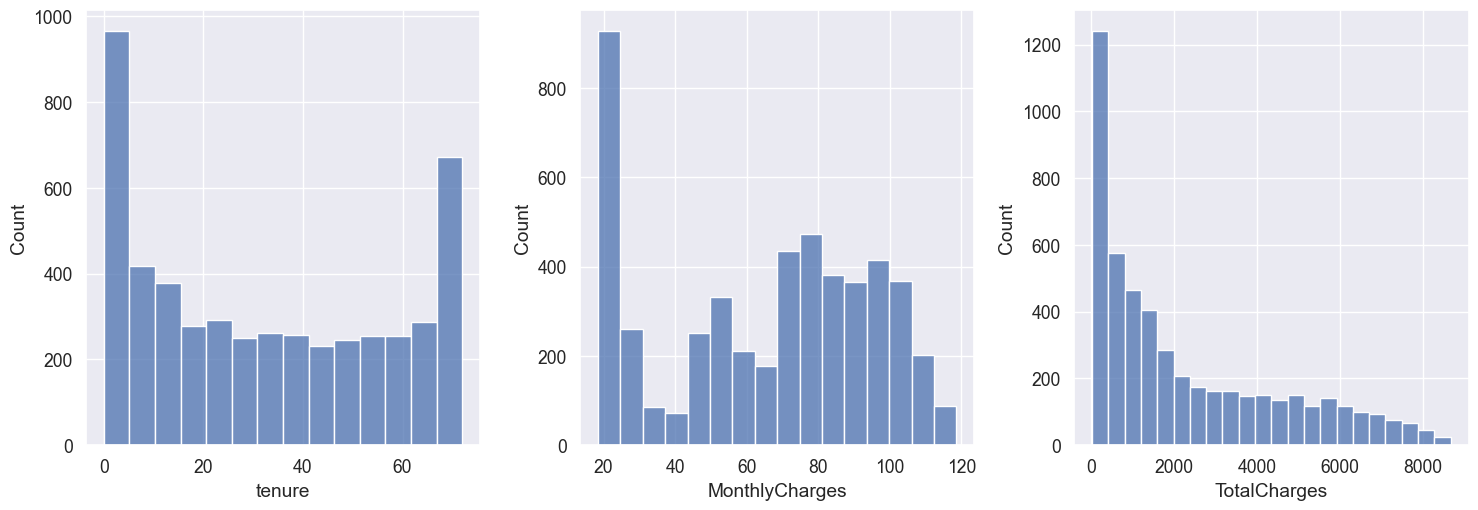

In [230]:
cols = 3
rows = 3
num_cols =train_df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = train_df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

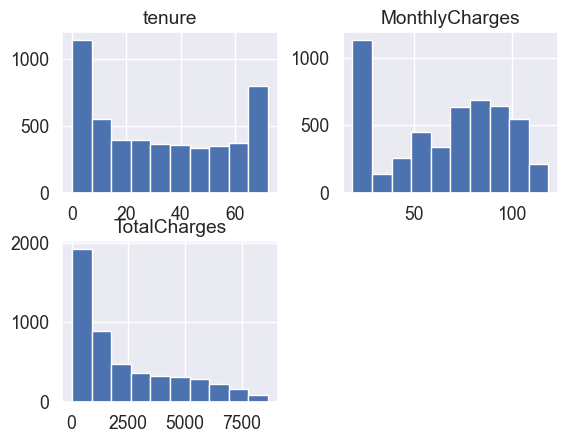

In [231]:
train_df.hist()

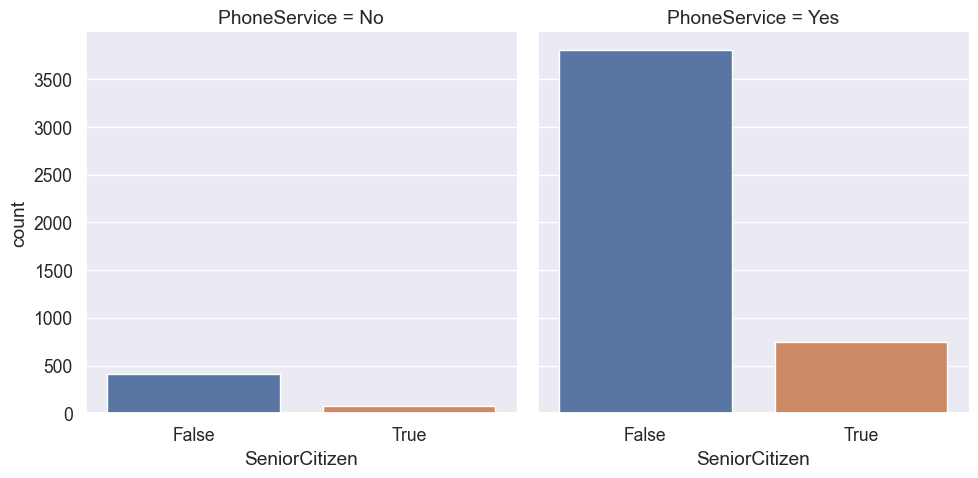

In [232]:
sns.catplot(data=train_df, x= 'SeniorCitizen', kind='count', col='PhoneService')

##### Check for outliers

<Axes: >

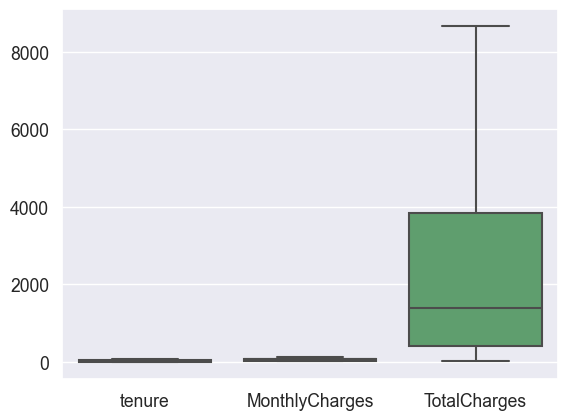

In [233]:
sns.boxplot(data=train_df)

It is observed that there are no outliers 

####  BIVARIATE ANALYSIS 

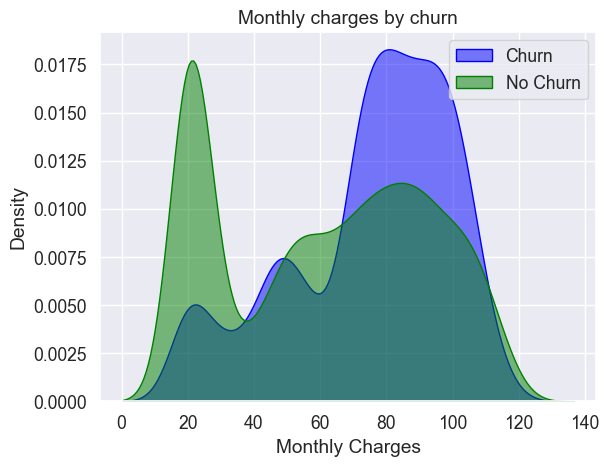

In [234]:
Mth_Chgs = sns.kdeplot(train_df.MonthlyCharges[(train_df["Churn"] == 'Yes') ],
                color="Blue", fill = True, alpha=.5)
Mth_Chgs = sns.kdeplot(train_df.MonthlyCharges[(train_df["Churn"] == 'No') ],
                ax =Mth_Chgs, color="Green", fill= True, alpha=.5)

Mth_Chgs.legend(["Churn", "No Churn"],loc='upper right')
Mth_Chgs.set_ylabel('Density')
Mth_Chgs.set_xlabel('Monthly Charges')
Mth_Chgs.set_title('Monthly charges by churn')

plt.show()


In [235]:
# Compare rate of Churn With All the Variables 
for i, predictor in enumerate(train_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    fig = px.histogram(train_df, x=predictor,  color='Churn', barmode='group',
                       color_discrete_sequence=['#1f77b4', '#aec7e8'],
                       title=f"Countplot of {predictor} by Churn")
    fig.update_layout(xaxis_title=predictor, yaxis_title="Count",
                      legend_title="Churn", height=400)
    fig.show()

#### MULTIVARIATE ANALYSIS

In [236]:
train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

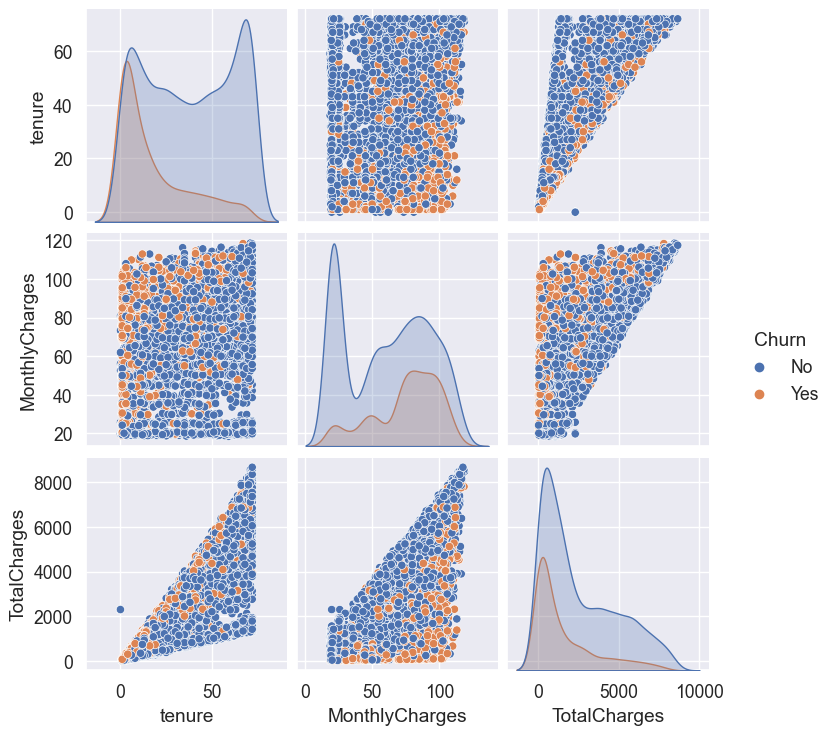

In [237]:
sns.pairplot(train_df, hue= 'Churn')

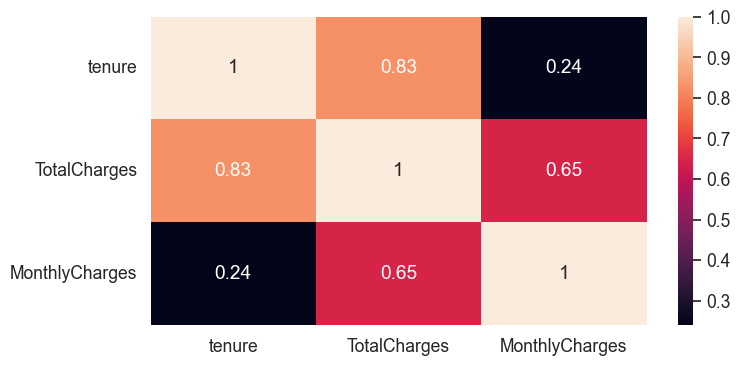

In [238]:
df = train_df[['tenure','TotalCharges','MonthlyCharges']]
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True);

In [239]:
train_df.dtypes


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [240]:
#voda_churn_train['TotalCharges'].astype('float')
train_df['TotalCharges'] = pd.to_numeric(train_df.TotalCharges, errors='coerce')
train_df['TotalCharges'].dtype

dtype('float64')